In [1]:
from importlib import reload    # module for reloading custom-written modules
import numpy as np
from math import *
from scipy.optimize import least_squares
import utils_lbrmt as lbrmt     # utility functions for plotting and data analysis

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import scienceplots             # module for scientific figures
plt.style.use('science')

In [2]:
reload(lbrmt)

<module 'utils_lbrmt' from '/Users/yuesun/code/lbrmt/utils/utils_lbrmt.py'>

## Set colormaps

In [3]:
# Custom colormap
# https://www.schemecolor.com/pastel-rainbow.php
rho_min, rho_max = 0.667, 3.0
cvals_rho = [0.667, 1.0, 1.5, 3.0]
colors = ['#fff2cc', '#D6E6FD', '#F5BAB7', '#E02A2A']  # fff2cc D9EAD3
norm = plt.Normalize(min(cvals_rho), max(cvals_rho))
tuples = list(zip(map(norm, cvals_rho), colors))
cm_rho = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

## Plot benchmark (4.1)

In [4]:
# Specify simulation time and directory
outdir = '../sims/fsi_ldc.out'
dt = 400     # number of time steps between each frame
fr = 36      # which frame to plot
fr_end = 100 # end frame
eps = 1.5    # blur zone half-width

### Plot one frame

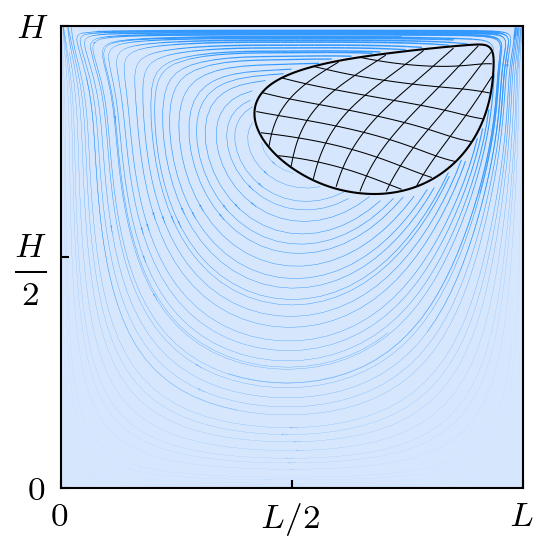

In [5]:
fig, ax, img = lbrmt.plot_field('density', outdir, fr, dt, figsize=(4, 2), dpi=300,
                                cmap=cm_rho, cmin=rho_min, cmax=rho_max, cvals=cvals_rho,
                                plot_rmap=True, plot_streamlines=True)

### Plot centroid trajectory

In [6]:
# Compute average locations (centroid) for all frames
avg_locs_all = []
for fr in range(fr_end+1):
    avg_locs, _ = lbrmt.compute_avg_locs_vels(outdir, fr, eps)
    avg_locs_all.append(avg_locs)

# Plot trajectory
cx, cy = np.array(avg_locs_all)[:, :, 0], np.array(avg_locs_all)[:, :, 1]

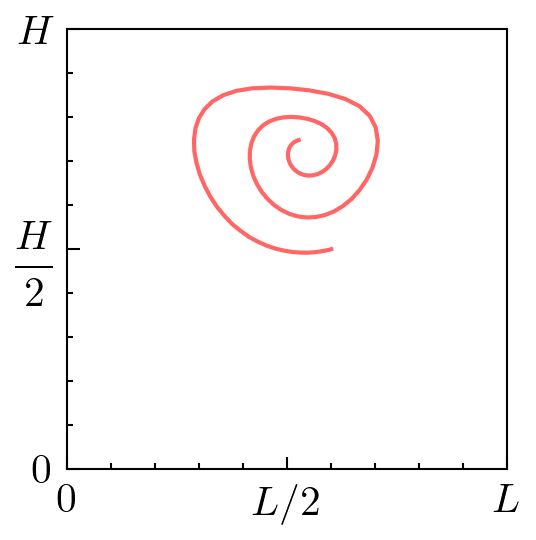

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=300)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0,
                 chartBox.width,
                 chartBox.height])

ax.plot(cx, cy, color='#ff6666')

# Layout bookkeeping
nx, ny = 200, 200
ax.set_aspect('equal')
ax.set_xlim(0, nx)
ax.set_xticks([0, nx//2, nx])
ax.set_xticklabels([0, r'$L/2$', '$L$'])
ax.set_ylim(0, ny)
ax.set_yticks([0, ny//2, ny])
ax.set_yticklabels([0, r'$\dfrac{H}{2}$', '$H$'])
ax.tick_params(axis='x', which='both', bottom=True,
               top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

fig.tight_layout()

## Plot rotating (4.2)

In [8]:
# Specify simulation time and directory
outdir = '../sims/fsi_rotate.out'
dt = 500     # number of time steps between each frame
fr = 45      # which frame to plot
fr_end = 180 # end frame
eps = 1.5    # blur zone half-width

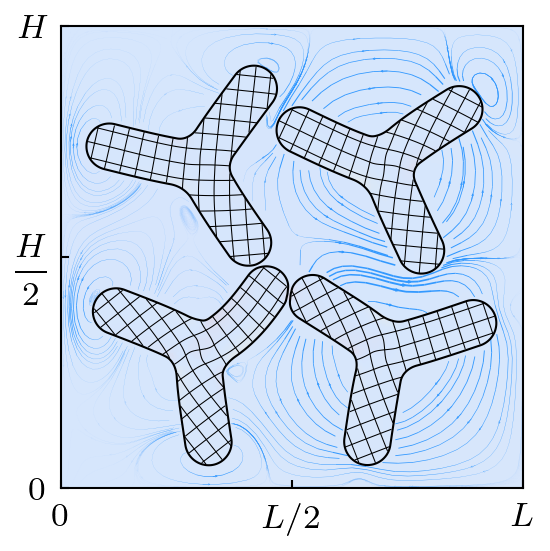

In [9]:
fig, ax, img = lbrmt.plot_field('density', outdir, fr, dt, figsize=(4, 2), dpi=300,
                                cmap=cm_rho, cmin=rho_min, cmax=rho_max, cvals=cvals_rho,
                                plot_rmap=True, plot_streamlines=True)

## Plot settling (4.3)

In [10]:
# Specify simulation time and directory
outdir = '../sims/fsi_settle.out'
dt = 200     # number of time steps between each frame
fr = 16      # which frame to plot
fr_end = 100 # end frame
eps = 1.5    # blur zone half-width

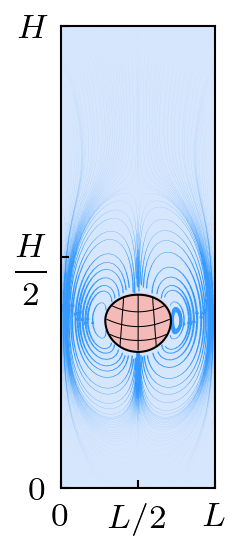

In [11]:
fig, ax, img = lbrmt.plot_field('density', outdir, fr, dt, figsize=(4, 2), dpi=300,
                                cmap=cm_rho, cmin=rho_min, cmax=rho_max, cvals=cvals_rho,
                                plot_rmap=True, plot_streamlines=True)

## Plot mixing (4.4)

In [12]:
# Specify simulation time and directory
outdir = '../sims/fsi_mix.out'
dt = 500     # number of time steps between each frame
fr = 22      # which frame to plot
fr_end = 100 # end frame
eps = 1.5    # blur zone half-width

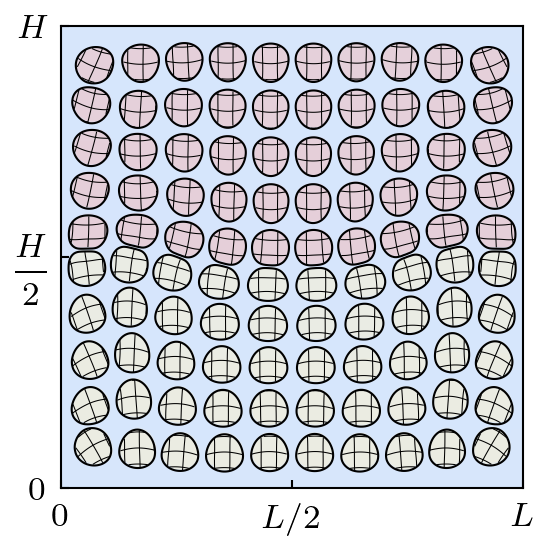

In [13]:
fig, ax, img = lbrmt.plot_field('density', outdir, fr, dt, figsize=(4, 2), dpi=300,
                                cmap=cm_rho, cmin=rho_min, cmax=rho_max, cvals=cvals_rho,
                                plot_rmap=True)